In [3]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Step 1

def load_dataset():
    url = "Visa_For_Lisa_Loan_Modelling.csv"
    dataset = pd.read_csv(url)
    
    return dataset

dataframe = load_dataset()


def clean_dataset(dataset):
    #del dataset['ID']
    dataset['Experience'] = dataset['Experience'].abs()

    return dataset

dataframe = clean_dataset(dataframe)

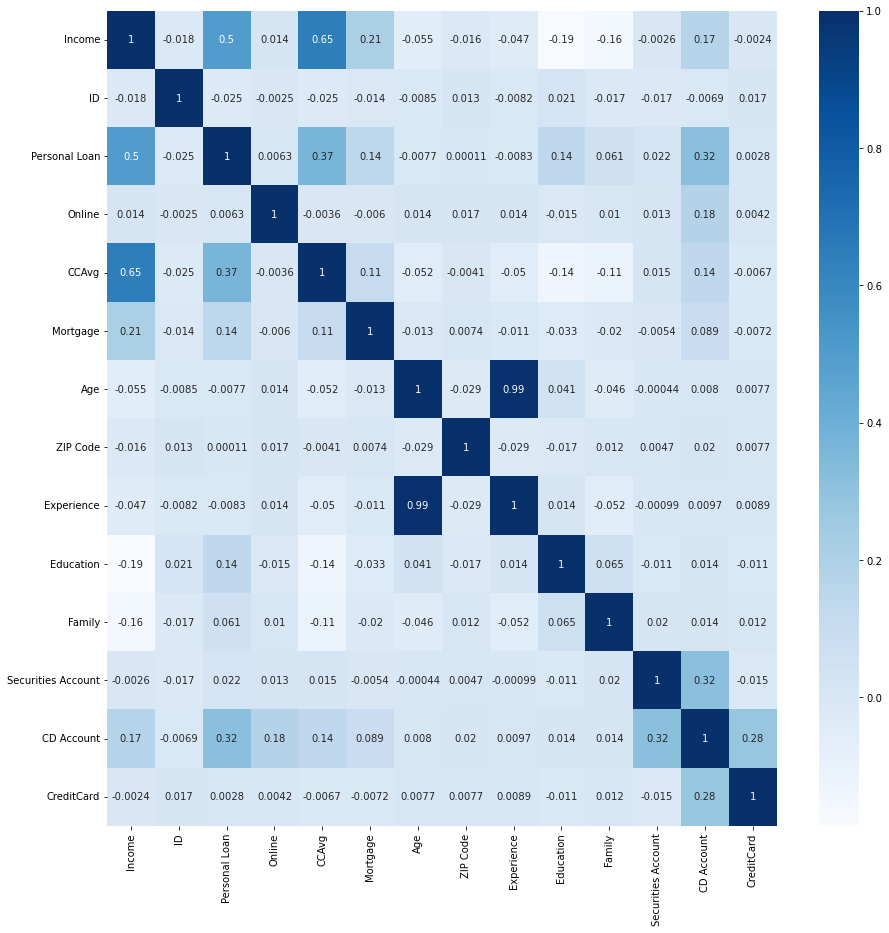

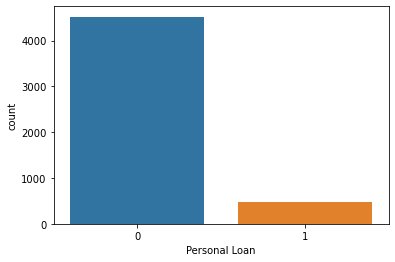

In [9]:
def getting_values(dataset):
    
    X = dataset.drop(columns = 'Personal Loan')
    y = dataset['Personal Loan']
    
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(dataset[['Income', 'ID', 'Personal Loan', 'Online', 'CCAvg', 'Mortgage', 'Age', 'ZIP Code', 'Experience', 'Education', 'Family', 'Securities Account', 'CD Account', 'CreditCard']].corr(), cmap='Blues', annot=True)
    plt.show()
    
    # count plot on single categorical variable
    sns.countplot(x ='Personal Loan', data = dataset)

    # Show the plot
    plt.show()
    
    return X, y

X, y = getting_values(dataframe)


In [10]:
def train_test(dataset):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21) # 21, 42 & 0 are popular ones
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test(dataframe)
#print(y_train)

In [13]:
def scalling(dataset):
    scaler = StandardScaler()
    #scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, scaler


X_train_scaled, X_test_scaled, scaler = scalling(dataframe)
#print(X_train_scaled)


In [24]:
def logistic_regression_model(dataset):
    #reg = LogisticRegression(solver='liblinear', C=10.0, random_state = 0).fit(X_train_scaled, y_train)
    reg = LogisticRegression().fit(X_train_scaled, y_train)
    
    #print(reg.summary2())
    
    y_train_pred = reg.predict(X_train_scaled)
    y_test_pred = reg.predict(X_test_scaled)
    
    # accuracy
    z_train = reg.score(X_train_scaled, y_train)
    z_test = reg.score(X_test_scaled, y_test)
    
    print("Accuracy of the model on train dataset, %")
    print(z_train * 100)
    print("Accuracy of the model on test dataset, %")
    print(z_test * 100)
   
    X_test_scaled_1 = scaler.transform(X)
    
    prediction_by_model = reg.predict(X_test_scaled_1)

    dataset['prediction_by_model'] = prediction_by_model
    
    return dataset
    


dataframe1 = logistic_regression_model(dataframe)

    

Accuracy of the model on train dataset, %
95.05
Accuracy of the model on test dataset, %
96.1


# Getting IDs of the Target Clients (defined by the model)

In [36]:
ID_s = dataframe1[['ID', 'prediction_by_model']]

ID_of_Clients_to_target = ID_s[ID_s['prediction_by_model'] == 1]
del ID_of_Clients_to_target['prediction_by_model']
print(ID_of_Clients_to_target)


        ID
9       10
10      11
16      17
18      19
38      39
...    ...
4883  4884
4937  4938
4962  4963
4980  4981
4993  4994

[365 rows x 1 columns]
